# Directed Chinese Postman Problem

<b>Goal:</b> Implement an algorithm to solve the directed Chinese postman problem and apply it to two examples.

## (a) Implementation

Implement an algorithm to solve the directed Chinese postman problem.

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

%matplotlib inline

In [45]:
from networkx.algorithms import bipartite
def print_bipartite_graph(G):
    X, Y = bipartite.sets(G)
    pos = dict()
    pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
    pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2
    nx.draw(G, pos=pos, with_labels = True)
    plt.show()

In [77]:
def chinese_postman_tour(G, U):
    '''Computes a Chinese postman tour in a directed graph.
    
    Args:
        G: A strongly connected weighted netwrokx digraph.
        U: A weakly connected set of arcs of G.
        
    Returns:
        A list of arcs in a Chinese postman tour in G that contains every arc
        of U at least once.
    '''
    # assign numbers to nodes
    balance = {}

    for a in U:
        start = a[0]
        end = a[1]
        if (start not in balance):
            balance[start] = 0
        if (end not in balance):
            balance[end] = 0

        balance[start] -= 1
        balance[end] += 1

    # remove 0-balanced edges
    balance = {b: balance[b] for b in balance if balance[b] != 0}

    shortestPathGraph = nx.DiGraph()
    from_nodes = []
    for start in [b for b in balance if balance[b] > 0]:
        for i in range(balance[start]):
            shortestPathGraph.add_node(f'{start}_{i}', bipartite=0)
            from_nodes.append(f'{start}_{i}')
            for end in [b for b in balance if balance[b] < 0]:
                weight = nx.shortest_path_length(G, source=start, target=end, weight='weight')
                for j in range(abs(balance[end])):
                    shortestPathGraph.add_node(f'{end}_{j}', bipartite=1)
                    shortestPathGraph.add_edge(f'{start}_{i}', f'{end}_{j}', weight=weight)


    print_bipartite_graph(shortestPathGraph)
    plt.show()

    min_matching = nx.algorithms.bipartite.matching.minimum_weight_full_matching(shortestPathGraph, top_nodes=from_nodes)
    for start in min_matching:
        if (start not in from_nodes):
            continue
        s = int(start.split('_')[0])
        end = int(min_matching[start].split('_')[0])
        u = None
        for p in nx.shortest_path(G, source=s, target=end, weight='weight'):
            if u is None :
                u = p
                continue
            v = p
            U.append((u,v))
            u = v
    return U

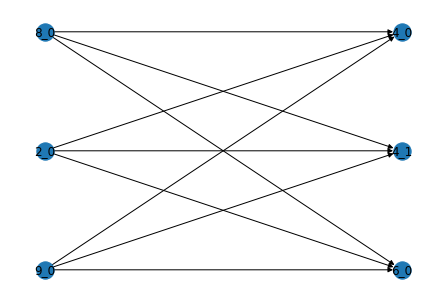

Tour: [(2, 3), (3, 6), (4, 2), (4, 9), (5, 2), (6, 5), (6, 7), (7, 8), (9, 1), (1, 4), (2, 3), (3, 6), (8, 9), (9, 1), (1, 4)]
Total tour weight: 27


In [78]:
# Test on example from script
G = nx.DiGraph()
G.add_weighted_edges_from([
    (1, 2, 3),
    (1, 4, 1),
    (2, 3, 1),
    (3, 6, 2),
    (4, 2, 1),
    (4, 9, 2),
    (5, 2, 2),
    (5, 4, 1),
    (6, 5, 3),
    (6, 7, 5),
    (7, 8, 2),
    (8, 6, 1),
    (8, 9, 2),
    (9, 1, 1)
])
U = [(2, 3), (3, 6), (4, 2), (4, 9), (5, 2), (6, 5), (6, 7), (7, 8)]
tour = chinese_postman_tour(G, U)
print(f'Tour: {tour}')
total_weight = sum(G.edges[e]['weight'] for e in tour)
print(f'Total tour weight: {total_weight}')

---

## (b) Skiing in Zermatt

Create a weighted digraph that corresponds to the map of the skiing resort in Zermatt and find the shortest possible round trip that traverses all ski runs.

In [ ]:
# Write your implementation here

---

## (c) Software testing

Create a weighted digraph that corresponds to software states and transitions between them and find the shortest possible sequence of transitions for testing.

In [ ]:
# Write your implementation here